In [4]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
import os

def traverse_directory(directory):
    l = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            l.append(os.path.join(root, file))
    return l

# Specify the directory you want to traverse
directory_to_traverse = 'dataset'

files = traverse_directory(directory_to_traverse)

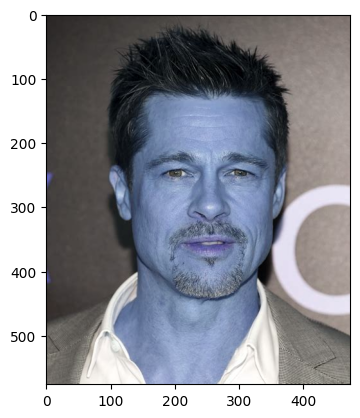

In [6]:
img = cv2.imread(files[100])
img.shape
plt.imshow(img)

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(576, 474)

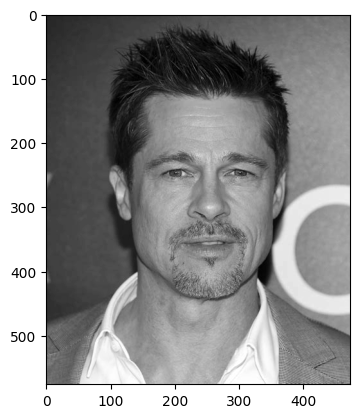

In [8]:
plt.imshow(gray, cmap="gray")

In [9]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[116, 140, 272, 272]])

In [10]:
(x,y,w,h) = faces[0] 

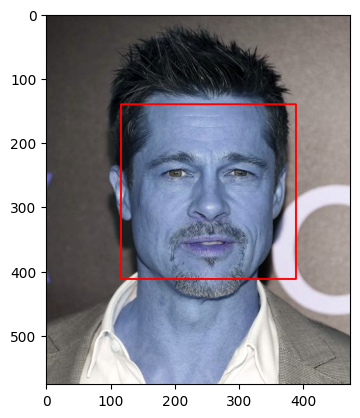

In [11]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h),(255,0,0), 2)
plt.imshow(face_img)

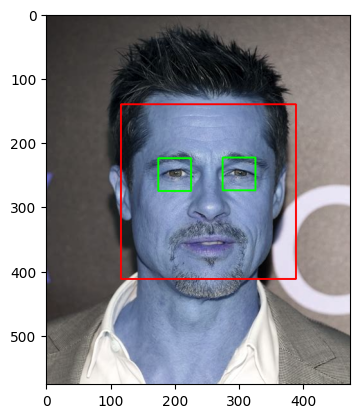

In [12]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

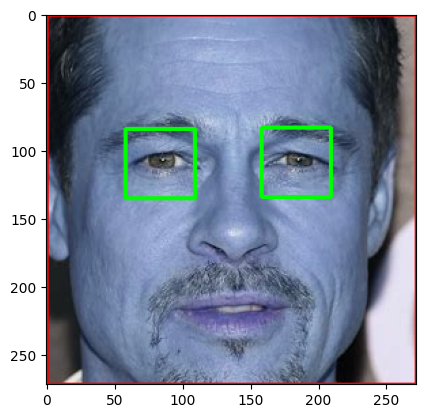

In [13]:
plt.imshow(roi_color)

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

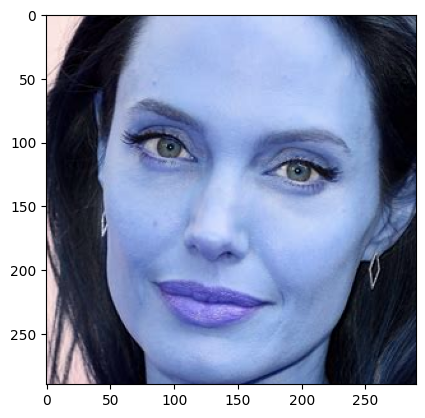

In [17]:
roi_color_sample = get_cropped_image_if_2_eyes(files[0])
plt.imshow(roi_color_sample)

In [18]:
path_to_data = "./dataset"
path_to_cr_data = "./dataset/cropped/"

In [19]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [31]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print("celebrity_name: ", celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Entry Path: ", entry.path)
                print("Generating cropped images in folder: ", cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            print("cropped_file_path: ", cropped_file_path )

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1





dataset\Angelina Jolie
Entry Path:  ./dataset\Angelina Jolie\001_fe3347c0.jpg
Generating cropped images in folder:  ./dataset/cropped/dataset\Angelina Jolie
cropped_file_path:  ./dataset/cropped/dataset\Angelina Jolie/dataset\Angelina Jolie1.png
Entry Path:  ./dataset\Angelina Jolie\002_8f8da10e.jpg
cropped_file_path:  ./dataset/cropped/dataset\Angelina Jolie/dataset\Angelina Jolie2.png
Entry Path:  ./dataset\Angelina Jolie\003_57612506.jpg
cropped_file_path:  ./dataset/cropped/dataset\Angelina Jolie/dataset\Angelina Jolie3.png
Entry Path:  ./dataset\Angelina Jolie\004_f61e7d0c.jpg
Entry Path:  ./dataset\Angelina Jolie\005_582c121a.jpg
cropped_file_path:  ./dataset/cropped/dataset\Angelina Jolie/dataset\Angelina Jolie4.png
Entry Path:  ./dataset\Angelina Jolie\006_9135205d.jpg
cropped_file_path:  ./dataset/cropped/dataset\Angelina Jolie/dataset\Angelina Jolie5.png
Entry Path:  ./dataset\Angelina Jolie\007_cabbfcbb.jpg
cropped_file_path:  ./dataset/cropped/dataset\Angelina Jolie/dataset

KeyboardInterrupt: 